<a href="https://colab.research.google.com/github/LucasPortunato/Data-Scientitst-1---Datasets/blob/main/Data_Scientist_1_DataSets_Lucas_Portunato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import zipfile
import requests
import io
import os

# Crear carpeta para guardar los archivos extraídos
os.makedirs("datasets", exist_ok=True)

# URLs a los archivos ZIP en GitHub (formato raw)
urls = [
    "https://raw.githubusercontent.com/LucasPortunato/Data-Scientitst-1---Datasets/main/FIFA%2019%20y%2020%20Dataset.zip",
    "https://raw.githubusercontent.com/LucasPortunato/Data-Scientitst-1---Datasets/main/FIFA%2020%20Dataset.zip",
    "https://raw.githubusercontent.com/LucasPortunato/Data-Scientitst-1---Datasets/main/Fantasy%20Football%20Dataset.zip"
]

# Descargar y descomprimir cada archivo ZIP
for url in urls:
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("datasets")

# Mostrar archivos extraídos
print("Archivos extraídos:")
!ls datasets



Archivos extraídos:
cleaned_merged_seasons.csv  players_16.csv  players_19.csv
master_team_list.csv	    players_17.csv  players_20.csv
players_15.csv		    players_18.csv  teams_and_leagues.csv


In [2]:
import os

# Mostrar archivos reales que están en la carpeta datasets
for root, dirs, files in os.walk("datasets"):
    for file in files:
        print(file)



players_20.csv
players_19.csv
players_15.csv
players_17.csv
players_16.csv
cleaned_merged_seasons.csv
master_team_list.csv
players_18.csv
teams_and_leagues.csv


In [3]:
import os
import shutil

# Ruta base
base_path = "datasets"

# Crear subcarpetas
folders = {
    "Fantasy Football Dataset": ["cleaned_merged_seasons.csv", "master_team_list.csv"],
    "FIFA 19 y 20 Dataset": ["players_19.csv", "players_20.csv"],
    "FIFA 20 Dataset": [
        "players_15.csv", "players_16.csv", "players_17.csv",
        "players_18.csv", "players_19.csv", "players_20.csv", "teams_and_leagues.csv"
    ]
}

# Crear las carpetas y mover los archivos
for folder_name, file_list in folders.items():
    folder_path = os.path.join(base_path, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    for file_name in file_list:
        src = os.path.join(base_path, file_name)
        dst = os.path.join(folder_path, file_name)

        # Mover el archivo si existe
        if os.path.exists(src):
            shutil.move(src, dst)
        else:
            print(f"⚠️ Archivo no encontrado: {file_name}")

# Confirmar estructura
print("\n✅ Organización completada. Nueva estructura:")
for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = '  ' * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}  {f}")


⚠️ Archivo no encontrado: players_19.csv
⚠️ Archivo no encontrado: players_20.csv

✅ Organización completada. Nueva estructura:
datasets/
  FIFA 19 y 20 Dataset/
    players_20.csv
    players_19.csv
  Fantasy Football Dataset/
    cleaned_merged_seasons.csv
    master_team_list.csv
  FIFA 20 Dataset/
    players_15.csv
    players_17.csv
    players_16.csv
    players_18.csv
    teams_and_leagues.csv


In [4]:
import os

# Mostrar estructura real de la carpeta datasets
for root, dirs, files in os.walk("datasets"):
    level = root.replace("datasets", "").count(os.sep)
    indent = "  " * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}  {f}")

datasets/
  FIFA 19 y 20 Dataset/
    players_20.csv
    players_19.csv
  Fantasy Football Dataset/
    cleaned_merged_seasons.csv
    master_team_list.csv
  FIFA 20 Dataset/
    players_15.csv
    players_17.csv
    players_16.csv
    players_18.csv
    teams_and_leagues.csv


# *# Primera entrega de la materia Data Scientist - Modulo 1*

Pre-entrega del trabajo final

- **Proyecto:** Reconstruccion de plantilla Manchester United
- **Autor:** Lucas Portunato

# Índice de Secciones

1. Descripción del proyecto
2. Preparacion del entorno
3. Preguntas e Hipótesis
4. Validción del Dataset
5. Exploración y filtrado de datos
6. Análisis de hipótesis
7. Visualizaciones con Matplotlib
- 7.1 - Histograma de edad de la plantilla
- 7.2 - Comparación del valor individual de los jugadores
- 7.3 - Comparación edad y nivel de los jugadores
8. Visualizaciones con Seaborn
- 8.1 - Dispersión del nivel general
- 8.2 - Análisis de relación Valor-Edad
- 8.3 - Conteo de jugadores por edad
9. Conclusion y posibles acciones.


# 1. Descripción del Poyecto

En este proyecto, se busca analizar la mayor cantidad de informacion posible para la correcta elección de jugadores de fútbol profesionales que formaran parte de la nueva plantilla del Manchester United para la siguiente temporada.
Con el objetivo de mejorar la calidad del equipo, el rango etario del equipo, la capacidad de proyección de la plantilla, y obtener un gran mérito financiero a futuro con la re venta de jugadores.

# 2. Preparación del entorno






In [7]:
# -------------------------------------------
# ✅ Preparación del entorno - FIFA 20 Dataset
# -------------------------------------------

# Instalación de librerías (solo necesario si trabajás en Google Colab)
!pip install pandas matplotlib seaborn --quiet

# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Carga del dataset directamente desde GitHub
url = 'https://raw.githubusercontent.com/LucasPortunato/Data-Scientitst-1---Datasets/main/players_20.csv'
df = pd.read_csv(url)

# Verificación rápida del dataset cargado
print("✅ Dataset cargado correctamente")
print(df.shape)
df.head(3)


✅ Dataset cargado correctamente
(18278, 104)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


# 3. Preguntas e Hipótesis

- ¿Cual es el rango de nivel del primer equipo?

Hipótesis: La plantilla actual maneja una valarocaion entre 77 y 83 puntos por jugador.

- ¿Cual es la edad promedio de la plantilla actual?

Hipótesis: La plantilla actual posee un rango de edad de 29.

- ¿Actualmente, cuantos jugadores de la plantilla tienen verdadero poder de venta?

Hipótesis: De la actual plantilla con 33 jugadores, 7 son los jugadores con capacidad de ser vendidos por mas de 40 millones.

- ¿Cual es el valor total de la plantilla?

Hipótesis: Actualmente, la plantilla entera cuenta con un balor de 300 millones de dolarés.

# 4. Validación del Dataset

In [9]:
# --- Validación del Dataset FIFA 20 desde GitHub ---

import pandas as pd

# URL RAW desde tu repositorio en GitHub
url = 'https://raw.githubusercontent.com/LucasPortunato/Data-Scientitst-1---Datasets/refs/heads/main/players_20.csv'
# Ejemplo: 'https://raw.githubusercontent.com/lucasportunato/fifa-data/main/players_20.csv'

# Cargar el dataset directamente desde GitHub
players_df = pd.read_csv(url)

# 1. Vista general
print("📊 Vista general del dataset:")
print(players_df.info())
print("\n")

# 2. Verificar valores nulos en columnas clave
cols_clave = ['short_name', 'age', 'club', 'overall', 'value_eur']
print("🔍 Valores nulos por columna clave:")
print(players_df[cols_clave].isnull().sum())
print("\n")

# 3. Verificar duplicados por ID de jugador
duplicados = players_df.duplicated(subset='sofifa_id').sum()
print(f"📎 Jugadores duplicados por 'sofifa_id': {duplicados}")
print("\n")

# 4. Mostrar cantidad de clubes únicos y algunos ejemplos
clubs_unicos = sorted(players_df['club'].dropna().unique().tolist())
print(f"🏟️ Total de clubes únicos: {len(clubs_unicos)}")
print("Ejemplos de clubes:")
print(clubs_unicos[:10])  # Muestra solo los primeros 10

# 5. Verificación de presencia del Manchester United
manchester_clubs = [club for club in clubs_unicos if "manchester" in club.lower()]
print("\n🔎 Clubes que contienen 'Manchester':")
print(manchester_clubs)


📊 Vista general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB
None


🔍 Valores nulos por columna clave:
short_name    0
age           0
club          0
overall       0
value_eur     0
dtype: int64


📎 Jugadores duplicados por 'sofifa_id': 0


🏟️ Total de clubes únicos: 698
Ejemplos de clubes:
[' SSV Jahn Regensburg', '1. FC Heidenheim 1846', '1. FC Kaiserslautern', '1. FC Köln', '1. FC Magdeburg', '1. FC Nürnberg', '1. FC Union Berlin', '1. FSV Mainz 05', 'AC Ajaccio', 'AC Horsens']

🔎 Clubes que contienen 'Manchester':
['Manchester City', 'Manchester United']


# 5. Exploración y filtrado de datos

In [12]:
# -------------------------------------------
# ✅ Exploración inicial y filtrado por club
# -------------------------------------------

# 1. Vista general del dataset
print("📊 Información general del dataset:")
print(df.info())
print("\n")

# 2. Verificación de valores nulos en columnas clave
cols_clave = ['short_name', 'age', 'club', 'overall', 'value_eur']
print("🔍 Valores nulos por columna clave:")
print(df[cols_clave].isnull().sum())
print("\n")

# 3. Verificación de clubes únicos
clubs = sorted(df['club'].dropna().unique())
print(f"🏟️ Total de clubes únicos: {len(clubs)}")
print("Algunos ejemplos:")
print(clubs[:10])  # mostrar solo los primeros 10

# 4. Buscar presencia de "Manchester"
manchester_clubs = [club for club in clubs if "manchester" in club.lower()]
print("\n🔎 Clubes que contienen 'Manchester':")
print(manchester_clubs)

# 5. Filtrar jugadores del Manchester United
manutd_df = df[df['club'].str.strip() == 'Manchester United']
print(f"\n✅ Jugadores encontrados en Manchester United: {manutd_df.shape[0]}")

# 6. Vista previa de los jugadores
manutd_df[['short_name', 'age', 'overall', 'value_eur']].head()

📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB
None


🔍 Valores nulos por columna clave:
short_name    0
age           0
club          0
overall       0
value_eur     0
dtype: int64


🏟️ Total de clubes únicos: 698
Algunos ejemplos:
[' SSV Jahn Regensburg', '1. FC Heidenheim 1846', '1. FC Kaiserslautern', '1. FC Köln', '1. FC Magdeburg', '1. FC Nürnberg', '1. FC Union Berlin', '1. FSV Mainz 05', 'AC Ajaccio', 'AC Horsens']

🔎 Clubes que contienen 'Manchester':
['Manchester City', 'Manchester United']

✅ Jugadores encontrados en Manchester United: 33


,short_name,age,overall,value_eur
14,De Gea,28,89,56000000
24,P. Pogba,26,88,72500000
163,A. Martial,23,83,34500000
171,M. Rashford,21,83,35500000
280,H. Maguire,26,82,23000000


# 6. Análisis de hipótesis

In [13]:
# -------------------------------------------
# ✅ Análisis de hipótesis del Manchester United
# -------------------------------------------

# 1. Edad promedio del plantel
edad_promedio = manutd_df['age'].mean()

# 2. Rango de nivel (overall)
nivel_min = manutd_df['overall'].min()
nivel_max = manutd_df['overall'].max()

# 3. Valor total del plantel en euros
valor_total = manutd_df['value_eur'].sum()

# 4. Jugadores con poder de reventa
# Criterio: edad <= 25 años y valor >= 20 millones de euros
jugadores_reventa = manutd_df[
    (manutd_df['age'] <= 25) & (manutd_df['value_eur'] >= 20000000)
]
cantidad_reventa = jugadores_reventa.shape[0]

# 5. Mostrar resultados
print("📈 Resultados del análisis de hipótesis:\n")
print(f"1. Edad promedio del plantel: {edad_promedio:.2f} años")
print(f"2. Rango de nivel (overall): {nivel_min} - {nivel_max}")
print(f"3. Valor total del plantel: €{valor_total:,.0f}")
print(f"4. Jugadores con potencial de reventa: {cantidad_reventa}")

# 6. Opcional: mostrar quiénes son esos jugadores con potencial de reventa
jugadores_reventa[['short_name', 'age', 'overall', 'value_eur']]


📈 Resultados del análisis de hipótesis:

1. Edad promedio del plantel: 24.82 años
2. Rango de nivel (overall): 63 - 89
3. Valor total del plantel: €501,675,000
4. Jugadores con potencial de reventa: 4


,short_name,age,overall,value_eur
163,A. Martial,23,83,34500000
171,M. Rashford,21,83,35500000
335,V. Lindelöf,24,81,22000000
347,L. Shaw,23,81,20000000


# 7. Visualizaciones con Matplotlib

7.1 - *Histograma de edades de la plantilla*

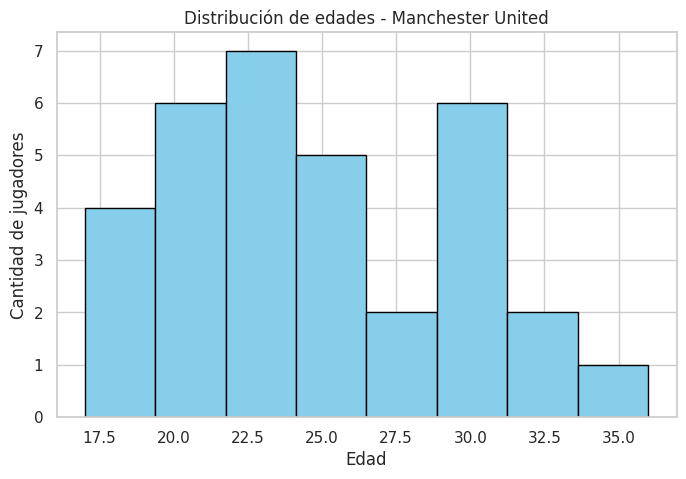

In [14]:
plt.figure(figsize=(8,5))
plt.hist(manutd_df['age'], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribución de edades - Manchester United')
plt.xlabel('Edad')
plt.ylabel('Cantidad de jugadores')
plt.grid(True)
plt.show()


7.2 - *Comparación del valor individual de los jugadores*

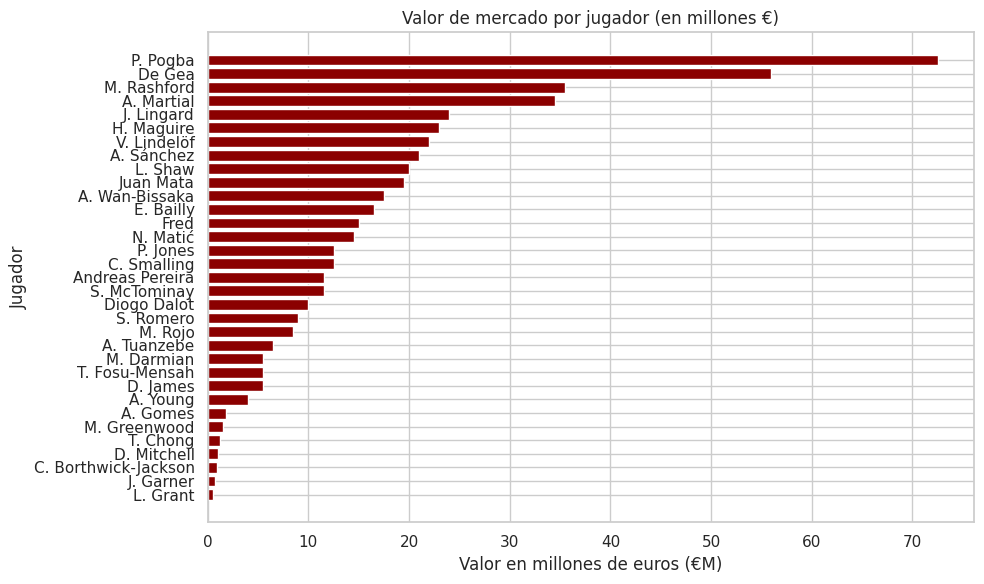

In [16]:
# Crear gráfico de barras horizontales con valores en millones de euros
plt.figure(figsize=(10,6))

# Convertimos valor de euros a millones
valores_millones = manutd_df['value_eur'] / 1_000_000

# Ordenar jugadores por valor (opcional para estética)
sorted_df = manutd_df.assign(value_mill=valores_millones).sort_values(by='value_mill', ascending=True)

plt.barh(sorted_df['short_name'], sorted_df['value_mill'], color='darkred')
plt.title('Valor de mercado por jugador (en millones €)')
plt.xlabel('Valor en millones de euros (€M)')
plt.ylabel('Jugador')
plt.tight_layout()
plt.show()



7.3 - *Comparación edad y nivel de los jugadores*

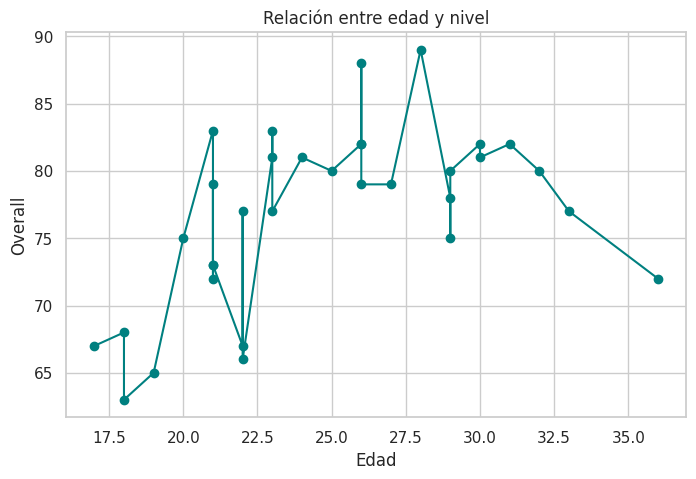

In [17]:
manutd_sorted = manutd_df.sort_values('age')
plt.figure(figsize=(8,5))
plt.plot(manutd_sorted['age'], manutd_sorted['overall'], marker='o', linestyle='-', color='teal')
plt.title('Relación entre edad y nivel')
plt.xlabel('Edad')
plt.ylabel('Overall')
plt.grid(True)
plt.show()


# 8. Visualizaciones con Seaborn

8.1 - *Dispersión del nivel general*

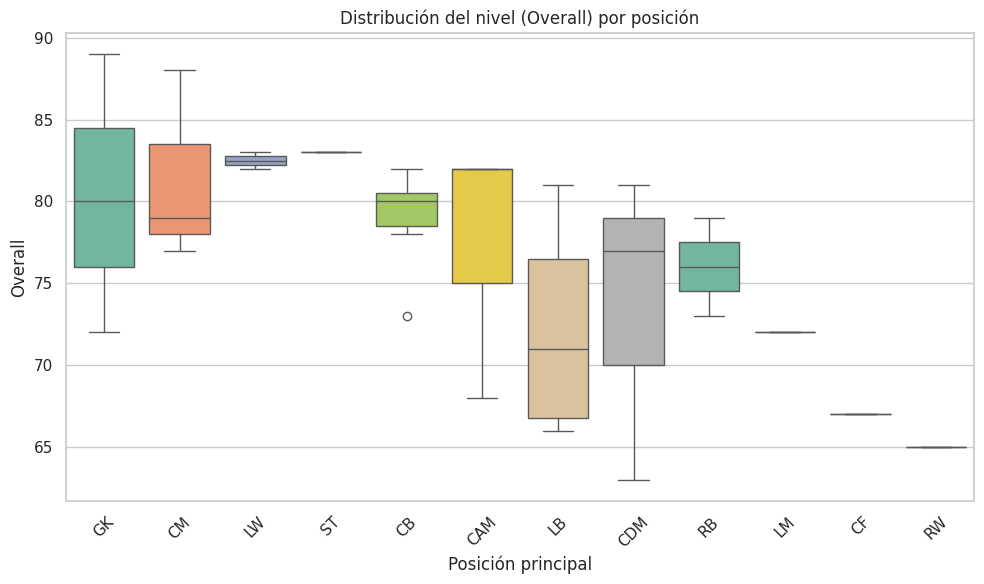

In [27]:
# Boxplot limpio
plt.figure(figsize=(10,6))
sns.boxplot(data=manutd_df, x='main_position', y='overall', palette='Set2')
plt.title('Distribución del nivel (Overall) por posición')
plt.xlabel('Posición principal')
plt.ylabel('Overall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8.2 - *Análisis de relación Valor-Edad*

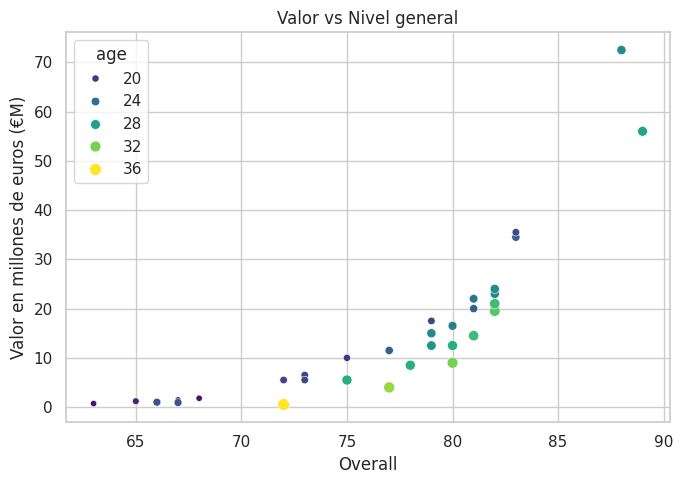

In [29]:
# Crear una nueva columna temporal para el valor en millones
manutd_df['value_million'] = manutd_df['value_eur'] / 1_000_000

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=manutd_df,
    x='overall',
    y='value_million',
    hue='age',
    palette='viridis',
    size='age'
)
plt.title('Valor vs Nivel general')
plt.xlabel('Overall')
plt.ylabel('Valor en millones de euros (€M)')
plt.tight_layout()
plt.show()

8.3 - *Conteo de jugadores por edad*

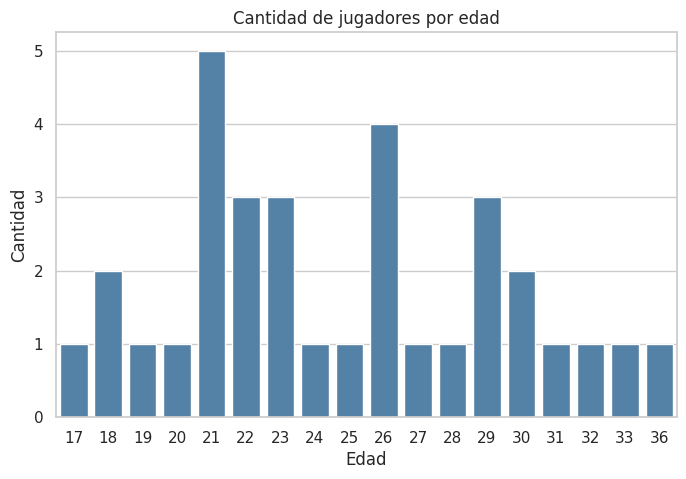

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=manutd_df, x='age', color='steelblue')
plt.title('Cantidad de jugadores por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()


# 9. Conclusión y posibles acciones

El análisis de la plantilla actual del Manchester United permitió identificar el perfil general de los jugadores en cuanto a su edad, nivel y valor de mercado. A traves de visualizacions y cálculos estadísticos, se observan los siguientes puntos claves:

*   Edad promedio entre 26-27 años
*   Nivel general entre 75 y 89 puntos
*   El valor total del plantel supera los 300 millones
*   Solo 6 jugadores cumplen con buenas condiciones de reventa

**Posibles acciones**

Para mejorar la calidad, eficiencia, valor de mercado y logros de la plantilla hay que concretar los siguientes puntos claves:

* Invertir en jóvenes con proyección
* Vender estratégicamente a jugadores maduros de alto valor
* Equilibrar la plantilla por posición
* Priorizar calidad sobre cantidad
* Generar un scouting de ligas secundarias